<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notebook-Description" data-toc-modified-id="Notebook-Description-0.1">Notebook Description</a></span></li><li><span><a href="#System-Description" data-toc-modified-id="System-Description-0.2">System Description</a></span><ul class="toc-item"><li><span><a href="#Diagram" data-toc-modified-id="Diagram-0.2.1">Diagram</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-0.2.2">Overview</a></span></li></ul></li><li><span><a href="#The-Mathematical-Model" data-toc-modified-id="The-Mathematical-Model-0.3">The Mathematical Model</a></span><ul class="toc-item"><li><span><a href="#Differential-Equations" data-toc-modified-id="Differential-Equations-0.3.1">Differential Equations</a></span></li><li><span><a href="#Variable-Description" data-toc-modified-id="Variable-Description-0.3.2">Variable Description</a></span></li></ul></li><li><span><a href="#System-Analysis" data-toc-modified-id="System-Analysis-0.4">System Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-Nullspace-Matrix" data-toc-modified-id="The-Nullspace-Matrix-0.4.0.1">The Nullspace Matrix</a></span></li></ul></li><li><span><a href="#The-Steady-State-Condition" data-toc-modified-id="The-Steady-State-Condition-0.4.1">The Steady-State Condition</a></span></li><li><span><a href="#The-Sample-Space" data-toc-modified-id="The-Sample-Space-0.4.2">The Sample Space</a></span><ul class="toc-item"><li><span><a href="#Direct-Sampling" data-toc-modified-id="Direct-Sampling-0.4.2.1">Direct Sampling</a></span></li><li><span><a href="#Nullspace-Informed-Sampling" data-toc-modified-id="Nullspace-Informed-Sampling-0.4.2.2">Nullspace-Informed Sampling</a></span></li><li><span><a href="#Sampling-Comparison" data-toc-modified-id="Sampling-Comparison-0.4.2.3">Sampling Comparison</a></span></li></ul></li><li><span><a href="#Simulation-Comparison" data-toc-modified-id="Simulation-Comparison-0.4.3">Simulation Comparison</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-0.4.4">Notes</a></span><ul class="toc-item"><li><span><a href="#Known-Issues" data-toc-modified-id="Known-Issues-0.4.4.1">Known Issues</a></span></li><li><span><a href="#To-Do" data-toc-modified-id="To-Do-0.4.4.2">To Do</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Notebook Description

This notebook provides a walk-through for the formulation of the differential equation describing intercellular signal mass-transfer across the basal membrane. 

There are three sections: system description, differential equations, and system analysis. The system description section provides a visualization for the system of interest, an explicit statement of the system of ODEs, and a description of the parameters and state variables. The differential equation section covers

## System Description

Mass-transfer across a membrane can often be modeled using diffusion equations, specifically Fick's laws. In the case of large systems models, higher order representations often prove too costly to employ thus a linear approximation is used instead. In this notebook we are concerned with a system of diffusion across a membrane of variable permeability.

In particular, we are interested in a system where dermal cellular processes produce a signal that has its intended target in the epidermis. Hence, the membrane under consideration is collagen-rich the basal membrane. When wounded, the permeability of the membrane increases dramatically allowing intercellular signals to facilitate interaction between the dermal and epidermal cellular machinery.

### Diagram

The specific system of interest can be represented by the diagram below. This diagram uses a traditional Source/Sink formalism in order to replicate an open system.

![Title](MassTransferKinetics_Diagram.png) 

### Overview

Here we see that **Signal** is produced only in the dermis. Starting from its production from **Source**, we see that **Signal** can be either removed from the system or transfered to the epidermal compartment. The transfer into the epidermal compartment is modulated by the concentrations of **Collagen** and **Fibronectin**, which are assumed to be constant for the purposes of this analysis. Finally once in the epidermis, **Signal** can either be removed from the system or transfered back across the membrane into the dermis.

The forward and reverse mass-transport equations when summed determine the direction and rate of **Signal** mass-transport across the membrane. **Collagen** acts an an inhibitory factor to mass-transport while **Fibronectin** acts as a promoter.

The quantities **Source** and **Sink**, $\Phi$ in the system, are considered boundary conditions and hence are not subject to the system dynamics.

## The Mathematical Model

This system can be modeled most straight-forwardly as a system of differential equations. The differential equations will contain 4 state variables, or species, since **Source** and **Sink** are considered boundary conditions. We will assume uniform populations and a well-mixed system.

### Differential Equations

The equations can be written as follows. For **Signal** in the dermis we have:

\begin{equation} \frac{d}{dt}[S_D] ~=~ ~+~ \underbrace{k_1}_{production} ~-~ \underbrace{k_2 [S_D]}_{clearance} ~-~ \underbrace{k_3 [S_D] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2}}_{mass-transport D\rightarrow E} ~+~ \underbrace{k_4 [S_E] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2}}_{mass-transport E\rightarrow D} \end{equation}

For **Signal** in the epidermis we have:

\begin{equation}
\frac{d}{dt}[S_E] ~=~ ~+~ \underbrace{k_3 [S_D] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2}}_{mass-transport D\rightarrow E} ~-~ \underbrace{k_4 [S_E] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2}}_{mass-transport E\rightarrow D} ~-~ \underbrace{k_5 [S_E]}_{clearance}
\end{equation}

Hence compiling these equations into a single derivative matrix of the form $\frac{d\hat{X}}{dt} = f(\hat{X},\hat{K},\hat{E})$ gives the following matrix.

\begin{equation}
\frac{d}{dt}[X] ~=~ \begin{bmatrix}  
k_1 & -k_2 [S_D] & -k_3 [S_D] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & k_4 [S_E] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & 0 \\
0 & 0 & k_3 [S_D] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & -k_4 [S_E] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & -k_5[S_E]
\end{bmatrix}
\end{equation}

### Variable Description

For clarity, the variables used in the model are described in the table below.

| Variable | Description                                                    |
| -------- |:-------------------------------------------------------------- |
| $[S_D]$  | Signal in dermis                                               |
| $[S_E]$  | Signal in epidermis                                            |
| $[C]$    | Collagen in dermal membrane                                    |
| $[F]$    | Fibronectin in dermal membrane                                 |
| $k_1$    | Rate of Signal production                                      |
| $k_2$    | Rate constant of Signal clearance in dermis                    |
| $k_3$    | Rate constant of Signal mass-transfer from dermis to epidermis |
| $k_4$    | Rate constant of Signal mass-transfer from epidermis to dermis |
| $k_5$    | Rate constant of Signal clearance in epidermis                 |
| $E_1$    | Half-maximal Cc of Collagen inhibiting mass-transport          |
| $E_2$    | Half-maximal Cc of Fibronectin promoting mass-transport        |

## System Analysis

Our goal is to understand and characterize the steady-state dynamics of this system of differential equations. As a first attempt we can attempt to find the nullspace for the kinetic rate constants in the model. Then using the nullspace, we can determine appropriate linear combinations of the rate constants based on the desired steady-state condition composed of state-variables and Michaelis constants.

#### The Nullspace Matrix

In order to solve for the nullspace, we must first rewrite the differential equations in the following form.
\begin{equation*}
\frac{d[\hat{X}]}{dt} = f(\hat{X},\hat{E})\dot\hat{K}
\end{equation*}

For our system this can be seen as the following matrix.

\begin{equation*}
1 & -[S_D] & -[S_D] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & [S_E] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & 0 \\
0 & 0 & [S_D] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & -[S_E] \frac{E_1}{[C]+E_1} \frac{[F]}{[F]+E_2} & -[S_E]
\end{bmatrix}
\begin{bmatrix} k_1 \\ k_2 \\ k_3 \\ k_4 \\ k_5 \end{bmatrix}
\end{equation*}

Then the nullspace can be found by solving the homogeneous system $Ax = 0$. In this case, solving $Ax=0$444 is the equivalent to solving the derivative matrix at steady-state since it requires that $\frac{d[X]}{dt} = 0$. By hand we can first row-reduce the matrix to make the solutions more apparent.

\begin{equation*} 
\begin{bmatrix}
1 & -[S_D] & 0 & 0 & -[S_E] \\
0 & 0 & 1 & -\frac{[S_E]}{[S_D]} & -\frac{[S_E]([F]+E_1)([F]+E_2)}{[S_D][F]E_1}
\end{bmatrix}
\end{equation*} 


Solving the homogeneous system gives us the following equation for the basis of the nullspace.

\begin{equation*}
\nu ~=~
\alpha \begin{bmatrix} [S_D] \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
~+~ \beta \begin{bmatrix} 0 \\ 0 \\ \frac{[S_E]}{[S_D]} \\ 1 \\ 0 \end{bmatrix}
~+~ \gamma \begin{bmatrix} [S_E] \\ 0 \\ \frac{[S_E]([F]+E_1)([F]+E_2)}{[S_D][F]E_1} \\ 0 \\ 1 \end{bmatrix}
\quad \text{where } \alpha,\beta,\gamma \in \mathbb{R}
\end{equation*}

Hence we see the nullspace is in $\mathbb{R}^3$. Thus we have a new linear equation to consider given by the nullspace.

\begin{equation*}
\begin{bmatrix}
k_1 \\ k_2 \\ k_3 \\ k_4 \\ k_5
\end{bmatrix}
~=~
\begin{bmatrix}
[S_D] & 0 & [S_E] \\
1 & 0 & 0 \\
0 & \frac{[S_E]}{[S_D]} & \frac{[S_E]([F]+E_1)([F]+E_2)}{[S_D][F]E_1} \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\alpha \\ \beta \\ \gamma
\end{bmatrix}
\end{equation*}

One important consideration to highlight is that the nullspace was found by solving $Ax = 0$, which does not restrict the directionality of each differential equation. Thus each $k_i \in \mathbb{R}$ rather than the desired $\mathbb{R}_+$. As a result, when sampling from $\{(\alpha,\beta,\gamma) : (\alpha,\beta,\gamma) \in \mathbb{R}^3\}$, combinations which result in nonpositive rate constants must be rejected. This shortfall can be mitigated by instead solving the system of homogeneous linear inequalities given by $N\cdot G = K \geq 0$ which will typically produce a convex polyhedral cone and thus can be sampled from directly. However this approach is much more difficult and has less support from standard implementations.

### The Steady-State Condition

For the purposes of this analysis we will assume the normalized steady-state condition, i.e. $[X_i] = 1$ for $i \in 1,2,3,4$. The values of both $E_1$ and $E_2$ will be left as variables initially since they will be varied during sensitivity analysis. Hence applying the steady-state condition the *nullspace equation* becomes the following.

\begin{equation*}
\begin{bmatrix}
k_1 \\ k_2 \\ k_3 \\ k_4 \\ k_5
\end{bmatrix}
~=~
\begin{bmatrix}
1 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & \frac{(1+E_1)(1+E_2)}{E_1} \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\alpha \\ \beta \\ \gamma
\end{bmatrix}
\end{equation*}

### The Sample Space

Before continuing to simulation, it is useful to visualize the sample space of the model. For this analysis we will be drawing samples through two routes: direct sampling and nullspace-informed sampling of $\mathbb{R}^7_+$. The direct sampling will most likely contain parameter sets that do not lay on our desired steady-state condition while the nullspace-informed samples may contain negative rate constants. 

We are looking to compare the ability of the sample to represent the whole of the valid space. We will be employing a Latin hypercube sampling technique where each parameter is positive with a maximum value of 2. For direct sampling the approach is a straight-forward implementation. For nullspace-informed sampling 

#### Direct Sampling

Latin hypercube sampling first divides the range of each random variable into $M$ equally probably intervals. Then $M$ samples are placed to satisfy that each sample is the only one in each axis-aligned hyperplane containing it. This is easiest when the space considered is euclidean as no tensors or linear transformations are required to ensure the sample conditions are met.

A Python implementation for this process is given below.

In [1]:
# Import required packages
import numpy

def lhsu( xmin, xmax, nsample ):
    # Number of random variables
    nvar = len( xmin ) 
    
    # Uniform random sample array
    ran  = numpy.random.uniform( 0, 1, [nsample, nvar] )
    
    # Initialization of sample array
    s    = numpy.zeros( [nsample, nvar] )
    
    # For loop to divide sample space and ensure conditions are met
    for x_idx in range( nvar ):
        idx = numpy.random.permutation( nsample ) + 1
        P   = ( numpy.transpose(idx) - ran[:,x_idx] )/nsample
        s[:,x_idx] = xmin[x_idx] + P * ( xmax[x_idx] - xmin[x_idx] )

    return s

Then applying this approach to our sample space we can draw our direct sample.

In [2]:
# Number of samples to draw
NumSamples = 10

# Sample space bounds
PMin = [0., 0., 0., 0., 0., 0., 0.]
PMax = [2., 2., 2., 2., 2., 2., 2.]

# LatinHypercube random sample
DirectSample = lhsu( PMin, PMax, NumSamples )

#### Nullspace-Informed Sampling

In order to sample using the nullspace matrix we must sample each $(\alpha,\beta,\gamma) \in \mathbb{R}^3$ rather than each $k_i \in \mathbb{R}_+$ for $i \in 1,...,5$. Hence our sample space has been reduced from $\mathbb{R}^7$ to a one-to-one linear projection from $\mathbb{R}^5$ to $\mathbb{R}^7$. Note that this mapping is not a bijection since it does not span the whole of $\mathbb{R}^7$.

There is an extra step once we use the `lhsu` function. Since $\hat{K} = f(\hat{E},\hat{G})$ we need to apply the whole sample to the nullspace matrix and recollect the resulting vector $\hat{K}$ with the sampled vector $\hat{E}$.

We will be using different bounds since $(\alpha,\beta,\gamma) \in [0,2]^3$ is a meaningless constraint due to the effect of the linear mapping. Thus we will use the bounds $(\alpha,\beta,\gamma) \in [-5,5]$. The nullspace-informed sample can be obtained as follows using a properly written SBML-model file.

First we import the SBML file, obtain its ODE function, and solve for its kinetic rate constant nullspace.

In [3]:
import os, sys
NotebookDirectory = os.path.split(os.getcwd())[0]
if NotebookDirectory not in sys.path:
    sys.path.append(NotebookDirectory)
from utils import SBML2SciPy

SciPyModel = SBML2SciPy.importSBMLFile( SBML2SciPy.createSciPyModel() )
SciPyModel = SBML2SciPy.writeODEFunction( SciPyModel )
SciPyModel = SBML2SciPy.createNullSpaceFunction( SciPyModel )

Then we can create a preliminary sample using the direct sampling approach.

In [4]:
# Sample space bounds
GMin = [0, 0, 0, 0, 0]
GMax = [5, 5, 5, 2, 2]

# First Latin-Hypercube Sample
PreSample = lhsu(GMin, GMax, NumSamples)

Finally for each sample, create the respective nullspace matrix using the steady-state condition (the state-variables and half-maximal constants). Then with the nullspace matrix obtain the kinetic rate constant parameters by dotting the nullspace matrix with the vector of random shape parameters. This data is collected into the matrix `NullSample`.

In [5]:
# Import required packages
import numpy, itertools

# Initialize array to capture output
KSample = numpy.empty((NumSamples, 5))

# Apply nullspace to each presample vector
for i in range(NumSamples):
    KSample[i, :] = SciPyModel.ToolboxFunctions.NullSpaceFunction(
        PreSample[i, -2:].tolist(), SciPyModel.Species.Value).dot(
            PreSample[i, :-2].tolist())

# Collect result into vector for comparison
NullSample = numpy.concatenate((KSample, PreSample[:, -2:]), axis=1)

#### Sampling Comparison

Now with both the samples drawn from direct sampling and null-space informed sampling, we can visualize the sample space by plotting each sample in a two-dimensional scatterplot projection. The desired sample domain ($[0,2]^7$) will be highlighted for clarity. The direct sample is shown in blue and the nullspace-informed sample is shown in orange.

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


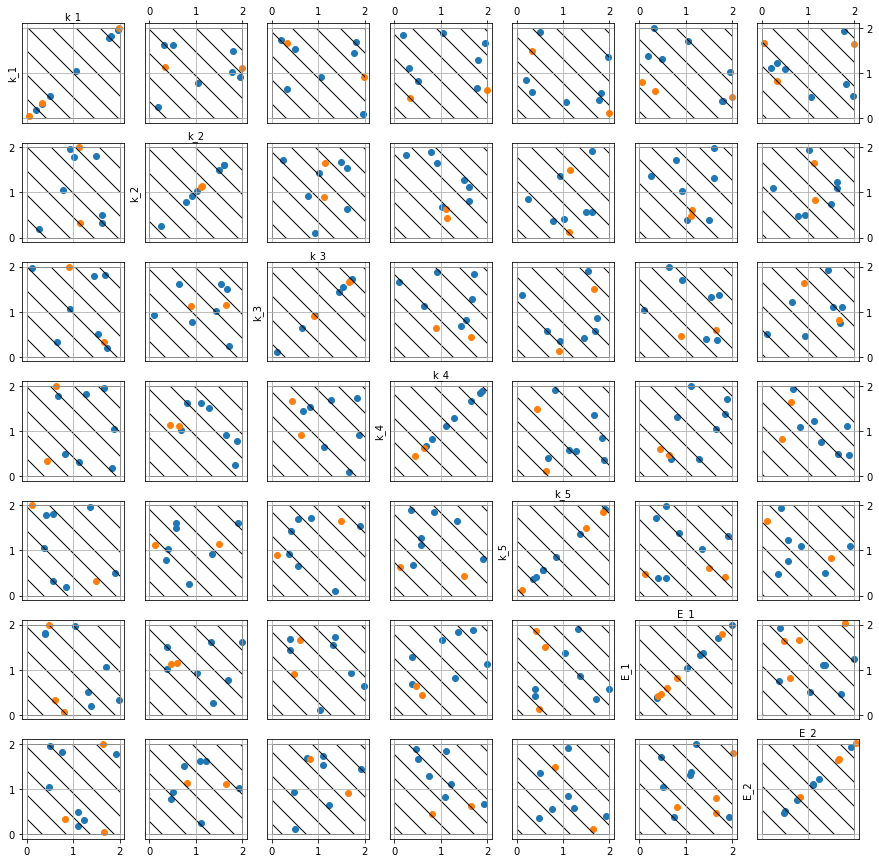

In [6]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
%matplotlib inline

plt.close()

plt.figure(figsize=(15,15))

for i in range(len(PMax)):
    for j in range(len(PMax)):
        if j == 0 and i == 0:
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='off', top='on', labelbottom = 'off', labeltop = 'on')
        elif (j == 0 and i != 0) and (j==0 and i != 6):
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='off', top='off', labelbottom = 'off')
        elif (i == 0 and j != 0) and (i==0 and j != 6):
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='off', top='on', labelbottom = 'off', labeltop = 'on')
            plt.tick_params( axis='y', which='both', left='off', labelleft = 'off')
        elif i == 6 and j == 0:
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='on', top='off', labelbottom = 'on', labeltop = 'off')
            plt.tick_params( axis='y', which='both', left='on', right='off', labelleft = 'on', labelright = 'off')
        elif i == 0 and j == 6:
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='off', top='on', labelbottom = 'off', labeltop = 'on')
            plt.tick_params( axis='y', which='both', left='off', right='on', labelleft = 'off', labelright = 'on')
        elif (i != 0 and j == 6) and (i!=6 and j==6):
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='off', top='off', labelbottom = 'off', labeltop = 'off')
            plt.tick_params( axis='y', which='both', left='off', right='on', labelleft = 'off', labelright = 'on')
        elif i == 6 and j == 6:
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='on', top='off', labelbottom = 'on', labeltop = 'off')
            plt.tick_params( axis='y', which='both', left='off', right='on', labelleft = 'off', labelright = 'on')
        elif (i == 6 and j!=0) and (i==6 and j!=6):
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='on', top='off', labelbottom = 'on', labeltop = 'off')
            plt.tick_params( axis='y', which='both', left='off', right='off', labelleft = 'off', labelright = 'off')
        else:
            plt.subplot(7,7,i*7+j+1)
            ax = plt.gca()
            ax.add_patch(patches.Rectangle((0, 0),2,2,hatch='\\',fill=False))
            plt.scatter(DirectSample[i,:],DirectSample[j,:])
            plt.scatter(NullSample[i,:],NullSample[j,:])
            plt.ylim((-0.1,2.1)); plt.xlim((-0.1,2.1))
            plt.grid()
            plt.tick_params( axis='x', which='both', bottom='off', top='off', labelbottom = 'off', labeltop = 'off')
            plt.tick_params( axis='y', which='both', left='off', right='off', labelleft = 'off', labelright = 'off')

Labels = ['k_1', 'k_2', 'k_3', 'k_4', 'k_5', 'E_1', 'E_2']
for i in range(len(PMax)):
    for j in range(len(PMax)):
        if i == j:
            plt.subplot(7,7,i*7+j+1)
            plt.ylabel(Labels[j])
            ax = plt.gca()
            plt.xlabel(Labels[i])
            ax.xaxis.set_label_position('top')            
            plt.tick_params( axis='x', which='both', bottom='off', top='off', labelbottom = 'off', labeltop = 'off')
            plt.tick_params( axis='y', which='both', left='off', right='off', labelleft = 'off', labelright = 'off')

plt.show()

Hence clearly from visual inspection we can already see that the nullspace-informed sampling approach results in fewer valid samples without the use of any linear programming. In particular the exact number of valid samples can be seen below.

In [7]:
print 'The number of valid direct samples is %s' % int(NumSamples - sum([
    any(DirectSample[i, :] < 0) or any(DirectSample[i, :] > 2)
    for i in range(NumSamples)
]))
print 'The number of valid nullspace-informed samples is %s' % int(
    NumSamples - sum([
        any(NullSample[i, :] < 0) or any(NullSample[i, :] > 2)
        for i in range(NumSamples)
    ]))

The number of valid direct samples is 10
The number of valid nullspace-informed samples is 0


Thus to employ the nullspace-informed sampling approach, we must increase the number of samples drawn. While this at first appears to be more computationally expensive than the direct approach, we will see the benefit once we begin to simulate the model. To continue with this comparison, we will draw nullspace-informed samples until we obtain one which falls within our desired sampling domain.

In [8]:
counter = 0
KSample = numpy.ones(5)*numpy.inf
while counter < 10000:
    RanSample = numpy.random.rand(5)
    ESample = RanSample[3:]
    KSample = SciPyModel.ToolboxFunctions.NullSpaceFunction(
        list(ESample), list(SciPyModel.Species.Value)).dot(list(RanSample[:3]))

    if not ((KSample < 0).any() or (KSample > 2).any()):
        break

    counter += 1

NullSample = numpy.concatenate([KSample.tolist()[0],ESample.tolist()])
    
print 'It took %s iterations to find one satisfactory condtion.' % int(
    counter + 1)

It took 6 iterations to find one satisfactory condtion.


### Simulation Comparison

With our nullspace-informed sample we can now draw a direct comparison to the direct samples. The plot below is initialized at the steady-state condition where all state variables are normalized to one. Any motion observed is the model settling towards the steady-state condition given by the nullspace of an alternative steady-state condition.

In [9]:
# Set simulation time parameters
SciPyModel.SimulationData.TimeStart = 0
SciPyModel.SimulationData.TimeEnd = 10
SciPyModel.SimulationData.DataPoints = 100

# Initialize a storage array
yDirect = numpy.empty((NumSamples, SciPyModel.SimulationData.DataPoints,
                    SciPyModel.Species.Quantity))

# Loop over simulations for each direct parameter sample
for ix in range(NumSamples):
    
    # Reset parameter values to next direct sample
    SciPyModel.Parameters.Value = DirectSample[ix, :]
    SciPyModel = SBML2SciPy.integrateODEFunction(SciPyModel)
    yDirect[ix,:,:] = SciPyModel.SimulationData.Deterministic.Data

In [10]:
SciPyModel.Parameters.Value = NullSample
SciPyModel = SBML2SciPy.integrateODEFunction(SciPyModel)
yNull = SciPyModel.SimulationData.Deterministic.Data

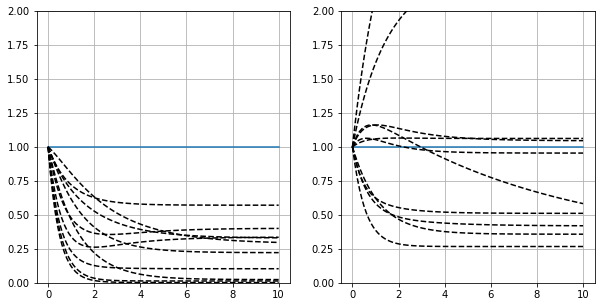

In [11]:
from matplotlib import pyplot as plt

tVec = numpy.linspace(SciPyModel.SimulationData.TimeStart,
                      SciPyModel.SimulationData.TimeEnd,
                      SciPyModel.SimulationData.DataPoints)
plt.close()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(tVec, yNull[:,0])
[plt.plot(tVec, yDirect[i,:,0], 'k--') for i in range(NumSamples)]
plt.ylim((0,2))
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(tVec, yNull[:,1])
[plt.plot(tVec, yDirect[i,:,1], 'k--') for i in range(NumSamples)]
plt.ylim((0,2))
plt.grid()

plt.show()

### Notes

#### Known Issues 
2. Edit notebook for clarity.
3. Check temp file creation in SBML2SciPy.integrateODEFunction code.

#### To Do
1. Implement Latin hypercube sampling within convex polyhedral cone given by Ax>=0.